In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('log_density.csv', sep=',')
data

,project_name,LOC,occurrence,log_density
0,adversarial-training,11320,5.0,2264.000000
1,AI-Training,22978,190.0,120.936842
2,ailearning,10898,4.0,2724.500000
3,Air-Pollution,872019,1839.0,474.181077
4,attention-lvcsr,142601,317.0,449.845426
...,...,...,...,...
105,Vigilantes,2010902,4679.0,429.771746
106,VITAE,2899,NaN,NaN
107,Voice-Privacy-Challenge-2022,13726,1.0,13726.000000
108,wikum,8727,4.0,2181.750000


In [3]:
data.shape[0]

110

In [4]:
nb_project_no_log = data.shape[0] - data.dropna().shape[0]
print("Percentage of project with at least one log {:.2%}".format((110 - nb_project_no_log)/data.shape[0]))

Percentage of project with at least one log 78.18%


In [5]:
log_density = data['LOC'].dropna().sum()/data['occurrence'].dropna().sum()
print("Log density :{}".format(log_density))

Log density :290.3467658505345


In [6]:
data_density_ = data.dropna()
data_density_.shape

(86, 4)

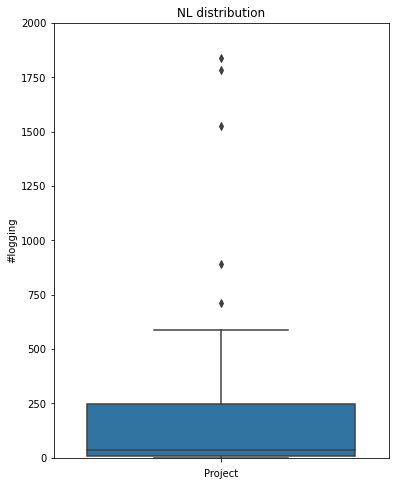

In [7]:
plt.figure(figsize=(6,8))
sns_plot = sns.boxplot(y=data_density_["occurrence"], )
plt.ylabel('#logging')
plt.xlabel('Project')
plt.ylim(0, 2000)
plt.title('NL distribution')
plt.savefig('logging_distribution_by_project.png', dpi=400)

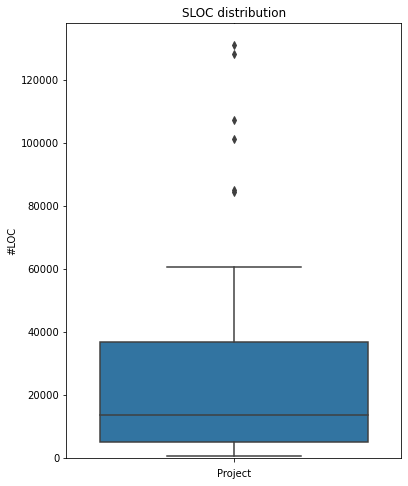

In [8]:
plt.figure(figsize=(6,8))
sns_plot = sns.boxplot(y=data_density_["LOC"], )
plt.ylabel('#LOC')
plt.xlabel('Project')
plt.title('SLOC distribution')
plt.ylim(0, 138000)
plt.savefig('LOC_distribution_by_project.png', dpi=400)

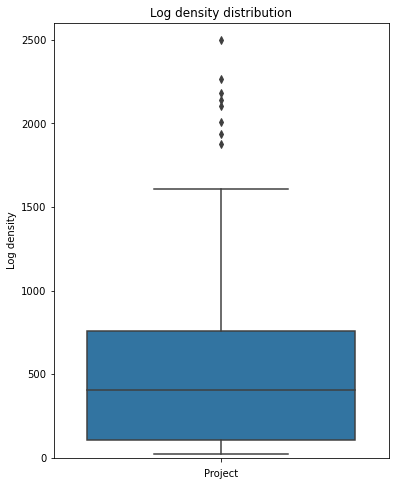

In [9]:

plt.figure(figsize=(6,8))
sns_plot = sns.boxplot(y=data_density_["log_density"], )
plt.ylabel('Log density')
plt.xlabel('Project')
plt.ylim(0, 2600)
plt.title('Log density distribution')
plt.savefig('log_distribution_by_project.png', dpi=400)

In [10]:
data_ = pd.read_csv('ML-logging.csv', sep=';')
data_.head()

,project_name,type,logging_statement
0,adversarial-training,python,logger.add_series
1,adversarial-training,python,logger.data_count
2,adversarial-training,python,logger.add_series
3,adversarial-training,python,logger.log
4,adversarial-training,python,logger.log


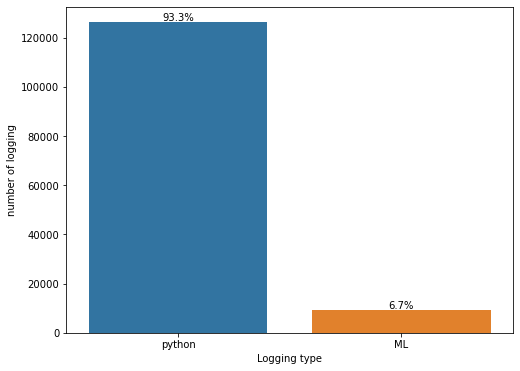

In [5]:
plt.figure(figsize=(8,6))
sns_plot = sns.countplot(x='type', 
            data=data_
           );
plt.xlabel('Logging type')
plt.ylabel('number of logging')
for c in sns_plot.containers:
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h/data_.type.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    
    sns_plot.bar_label(c, labels=labels, label_type='edge')
plt.savefig('logging_distibution.png', dpi=400)

In [3]:
df = pd.read_csv('RQ1project_size2.csv',sep=',')
df.head()

,project_name,number_file,SLOC
0,adversarial-training,62,11320
1,AI-Training,128,22978
2,ailearning,131,10898
3,Air-Pollution,3248,872019
4,attention-lvcsr,613,142601


In [4]:
df_ = pd.read_csv(r'C:\Users\fpatr\PycharmProjects\GitHub\data\final_data.csv', sep=',')
df_.head()

,project_name,num_stars,num_forks,num_contributor,num_commit
0,OmdenaAI/omdena-philippines-renewable,32,7,11,129
1,autorope/donkeycar,2216,1144,110,2126
2,ericlavigne/CarND-Capstone-Wolf-Pack,40,23,15,221
3,anton164/predicting-citation-counts,2,0,3,176
4,nitishtalekar/ProjectsGit,1,2,3,441


In [5]:
df_['project_name'] = df_['project_name'].map(lambda x: x.split('/')[-1])
df_

,project_name,num_stars,num_forks,num_contributor,num_commit
0,omdena-philippines-renewable,32,7,11,129
1,donkeycar,2216,1144,110,2126
2,CarND-Capstone-Wolf-Pack,40,23,15,221
3,predicting-citation-counts,2,0,3,176
4,ProjectsGit,1,2,3,441
...,...,...,...,...,...
105,QMCTorch,15,2,3,1070
106,botorch,2201,248,55,1096
107,PythonNeuralNetNLP,2,0,2,655
108,speechbrain,3760,698,81,5969


In [6]:
final_data = df.merge(df_)
final_data

,project_name,number_file,SLOC,num_stars,num_forks,num_contributor,num_commit
0,adversarial-training,62,11320,9,0,5,213
1,AI-Training,128,22978,1,16,14,160
2,ailearning,131,10898,32770,10758,41,207
3,Air-Pollution,3248,872019,1,2,5,106
4,attention-lvcsr,613,142601,259,106,4,945
...,...,...,...,...,...,...,...
105,VITAE,14,2899,14,6,3,459
106,Vigilantes,7510,2010902,1,0,9,219
107,Voice-Privacy-Challenge-2022,99,13726,11,3,7,393
108,wikum,118,8727,103,32,13,1403


In [15]:
print("mean: {}".format(final_data["num_commit"].mean()))
print("max: {}".format(final_data["num_commit"].max()))
print("min: {}".format(final_data["num_commit"].min()))
print("median: {}".format(final_data["num_commit"].median()))
print("25%: {}".format(final_data["num_commit"].quantile(0.25)))
print("75%: {}".format(final_data["num_commit"].quantile(0.75)))

mean: 759.5454545454545
max: 9139
min: 42
median: 323.0
25%: 172.25
75%: 782.25


In [24]:
final_data["num_stars"].describe()

count      110.000000
mean      1167.963636
std       4090.253804
min          1.000000
25%          2.000000
50%         20.500000
75%        284.750000
max      32770.000000
Name: num_stars, dtype: float64

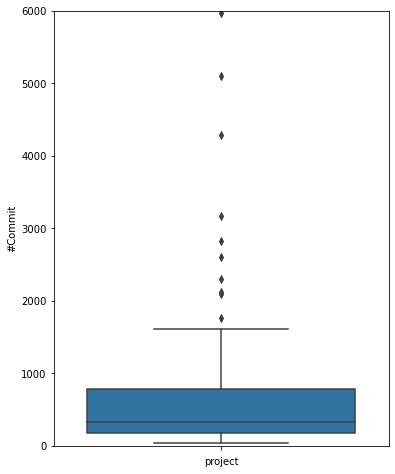

In [10]:
plt.figure(figsize=(6,8))
sns_plot = sns.boxplot(y=final_data["num_commit"])
plt.ylabel('#Commit')
plt.xlabel('project')
plt.ylim(0, 6000)
plt.savefig('Commit.png', dpi=400)

In [16]:
print("mean: {}".format(final_data["number_file"].mean()))
print("max: {}".format(final_data["number_file"].max()))
print("min: {}".format(final_data["number_file"].min()))
print("median: {}".format(final_data["number_file"].median()))
print("25%: {}".format(final_data["number_file"].quantile(0.25)))
print("75%: {}".format(final_data["number_file"].quantile(0.75)))

mean: 272.95454545454544
max: 7510
min: 5
median: 101.0
25%: 35.25
75%: 210.0


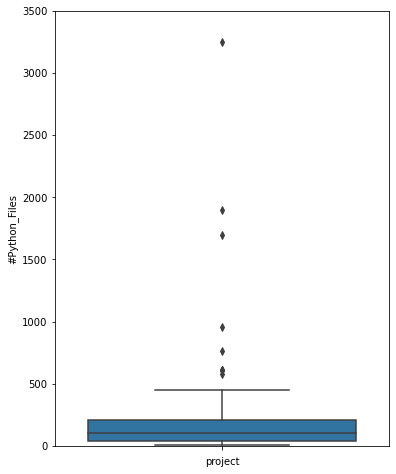

In [11]:
plt.figure(figsize=(6,8))
sns_plot = sns.boxplot(y=final_data["number_file"], )
plt.ylabel('#Python_Files')
plt.xlabel('project')
plt.ylim(0, 3500)
plt.savefig('File.png', dpi=400)

In [17]:
print("mean: {}".format(final_data["SLOC"].mean()))
print("max: {}".format(final_data["SLOC"].max()))
print("min: {}".format(final_data["SLOC"].min()))
print("median: {}".format(final_data["SLOC"].median()))
print("25%: {}".format(final_data["SLOC"].quantile(0.25)))
print("75%: {}".format(final_data["SLOC"].quantile(0.75)))

mean: 53579.53636363636
max: 2010902
min: 244
median: 10662.5
25%: 3647.75
75%: 31228.0


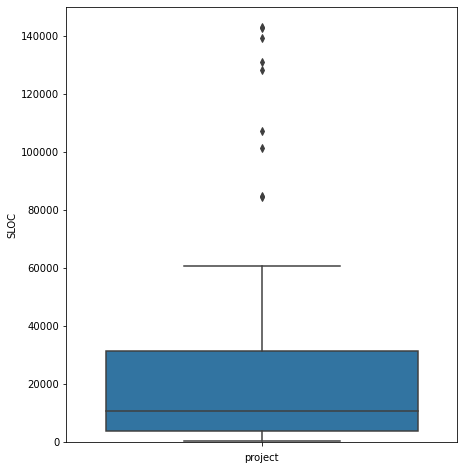

In [12]:
plt.figure(figsize=(7,8))
sns_plot = sns.boxplot(y=final_data["SLOC"], )
plt.xlabel('project')
plt.ylim(0, 150000)
plt.savefig('SLOC.png', dpi=400)

In [18]:
print("mean: {}".format(final_data["num_contributor"].mean()))
print("max: {}".format(final_data["num_contributor"].max()))
print("min: {}".format(final_data["num_contributor"].min()))
print("median: {}".format(final_data["num_contributor"].median()))
print("25%: {}".format(final_data["num_contributor"].quantile(0.25)))
print("75%: {}".format(final_data["num_contributor"].quantile(0.75)))

mean: 18.927272727272726
max: 261
min: 2
median: 5.0
25%: 3.0
75%: 13.0


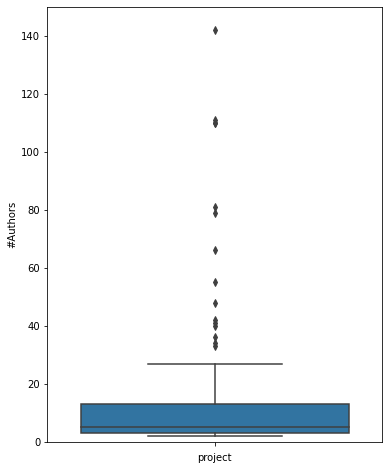

In [13]:
plt.figure(figsize=(6,8))
sns_plot = sns.boxplot(y=final_data["num_contributor"], )
plt.ylabel('#Authors')
plt.xlabel('project')
plt.ylim(0, 150)
plt.savefig('Authors.png', dpi=400)

In [19]:
print("mean: {}".format(final_data["num_stars"].mean()))
print("max: {}".format(final_data["num_stars"].max()))
print("min: {}".format(final_data["num_stars"].min()))
print("median: {}".format(final_data["num_stars"].median()))
print("25%: {}".format(final_data["num_stars"].quantile(0.25)))
print("75%: {}".format(final_data["num_stars"].quantile(0.75)))

mean: 1167.9636363636364
max: 32770
min: 1
median: 20.5
25%: 2.0
75%: 284.75


In [31]:
logging = pd.read_csv(r'C:\Users\fpatr\PycharmProjects\GitHub\data\outputs\AI_logging_data.csv', sep=';')
logging

,project_name,Type_logging,path,logging_statement,occurrence
0,adversarial-training,general,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,logger.log,2
1,adversarial-training,general,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,warnings.warn,1
2,adversarial-training,general,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,warnings.warn,2
3,AI-Training,ML,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,self.hparams.train_logger.log_stats,2
4,AI-Training,general,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,logger.warn,5
...,...,...,...,...,...
6353,zr-obp,general,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,logger.info,1
6354,zr-obp,general,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,logger.warning,1
6355,zr-obp,general,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,logger.warning,1
6356,zr-obp,general,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,logger.warning,1


In [32]:
code = pd.read_csv(r'C:\Users\fpatr\PycharmProjects\GitHub\RQ1\log_density.csv', sep=',')
code

,project_name,LOC,occurrence,log_density
0,adversarial-training,11320,5.0,2264.000000
1,AI-Training,22978,190.0,120.936842
2,ailearning,10898,4.0,2724.500000
3,Air-Pollution,872019,1839.0,474.181077
4,attention-lvcsr,142601,317.0,449.845426
...,...,...,...,...
105,Vigilantes,2010902,4679.0,429.771746
106,VITAE,2899,NaN,NaN
107,Voice-Privacy-Challenge-2022,13726,1.0,13726.000000
108,wikum,8727,4.0,2181.750000


In [33]:
log_density = code['LOC'].sum()/logging['occurrence'].sum()
print("Log density egal : {}".format(log_density))

Log density egal : 290.8195499851969


In [34]:
logging.groupby('Type_logging').occurrence.sum()

Type_logging
ML          1682
general    18584
Name: occurrence, dtype: int64

In [35]:
logging.loc[(logging.Type_logging.str.contains('general')),'Type_logging']='GENERAL'

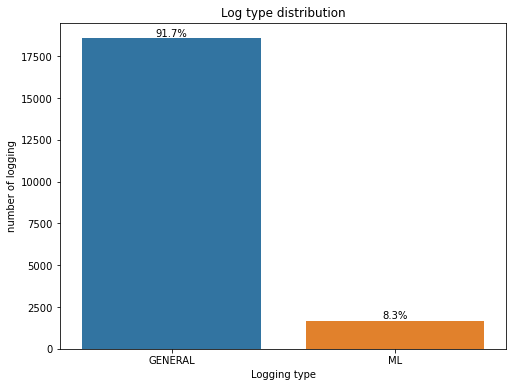

In [36]:
plt.figure(figsize=(8,6))
sns_plot = sns.barplot(x='Type_logging', y='occurrence',
            data=logging,
            estimator=np.sum,
            ci=None
           );
plt.xlabel('Logging type')
plt.ylabel('number of logging')
plt.title('Log type distribution')
for c in sns_plot.containers:
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h/logging.occurrence.sum()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    
    sns_plot.bar_label(c, labels=labels, label_type='edge')
plt.savefig('logging_distibution_update.pdf', dpi=400)

In [37]:
contain_values = logging[logging['logging_statement'].str.contains('debug|info|warn|error|critical|except|fatal')]
contain_values

,project_name,Type_logging,path,logging_statement,occurrence
1,adversarial-training,GENERAL,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,warnings.warn,1
2,adversarial-training,GENERAL,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,warnings.warn,2
4,AI-Training,GENERAL,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,logger.warn,5
5,AI-Training,GENERAL,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,logger.warning,2
7,AI-Training,GENERAL,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,logger.error,1
...,...,...,...,...,...
6353,zr-obp,GENERAL,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,logger.info,1
6354,zr-obp,GENERAL,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,logger.warning,1
6355,zr-obp,GENERAL,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,logger.warning,1
6356,zr-obp,GENERAL,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,logger.warning,1


In [38]:
contain_values.loc[(contain_values.logging_statement.str.contains('debug')),'logging_statement']='DEBUG'
contain_values.loc[(contain_values.logging_statement.str.contains('info')),'logging_statement']='INFO'
contain_values.loc[(contain_values.logging_statement.str.contains('warn')),'logging_statement']='WARNING'
contain_values.loc[(contain_values.logging_statement.str.contains('error')),'logging_statement']='ERROR'
contain_values.loc[(contain_values.logging_statement.str.contains('critical')),'logging_statement']='CRITICAL'
contain_values.loc[(contain_values.logging_statement.str.contains('except')),'logging_statement']='EXCEPTION'
contain_values.loc[(contain_values.logging_statement.str.contains('fatal')),'logging_statement']='FATAL'
contain_values

,project_name,Type_logging,path,logging_statement,occurrence
1,adversarial-training,GENERAL,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,WARNING,1
2,adversarial-training,GENERAL,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,WARNING,2
4,AI-Training,GENERAL,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,WARNING,5
5,AI-Training,GENERAL,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,WARNING,2
7,AI-Training,GENERAL,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,ERROR,1
...,...,...,...,...,...
6353,zr-obp,GENERAL,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,INFO,1
6354,zr-obp,GENERAL,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,WARNING,1
6355,zr-obp,GENERAL,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,WARNING,1
6356,zr-obp,GENERAL,C:\Users\fpatr\PycharmProjects\GitHub\data\out...,WARNING,1


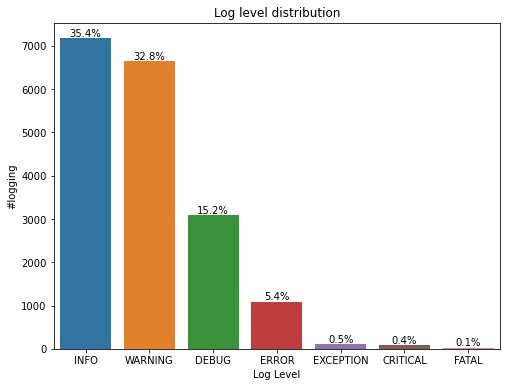

In [39]:
plt.figure(figsize=(8,6))
sns_plot = sns.barplot(x='logging_statement', y='occurrence',
            data=contain_values,
            estimator=np.sum,
            order=["INFO","WARNING", "DEBUG", "ERROR", "EXCEPTION","CRITICAL","FATAL"],
            ci=None
           );
plt.xlabel('Log Level')
plt.ylabel('#logging')
plt.title('Log level distribution')
for c in sns_plot.containers:
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h/logging.occurrence.sum()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    
    sns_plot.bar_label(c, labels=labels, label_type='edge')
plt.savefig('logging_level_distibution.pdf', dpi=400)

In [9]:
data_paper = pd.read_csv('log_density_paper.csv', sep=';')
data_paper

,Paper,Log_density
0,This paper (ML),290
1,Yuan et al. (C/C++),30
2,Chen et al (JAVA),51
3,Zhu et al. (C#),58
4,Zeng et al. (Android),479


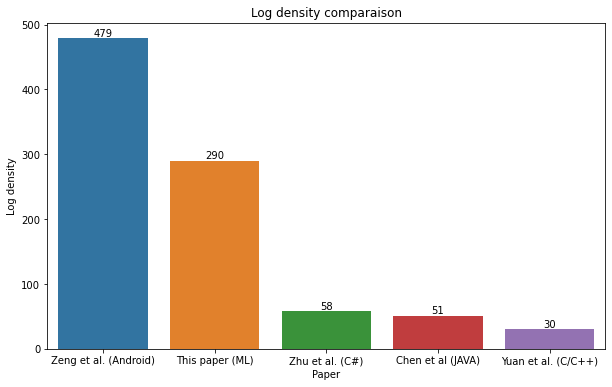

In [10]:
plt.figure(figsize=(10,6))
sns_plot = sns.barplot(x='Paper', y='Log_density',
            data=data_paper,
            order=["Zeng et al. (Android)","This paper (ML)", "Zhu et al. (C#)", "Chen et al (JAVA)", "Yuan et al. (C/C++)"],
            ci=None
           );
plt.xlabel('Paper')
plt.ylabel('Log density')
plt.title('Log density comparaison')
sns_plot.bar_label(sns_plot.containers[0])
plt.savefig('Log_density_comparaison.pdf', dpi=400)